# Content：
##   [1. Backgroud Information](#jump1)

##  [2. Investigation into Data](#jump2)

### [2.1 Put questions](#jump2.1)
### [2.2 Wrangle data](#jump2.2)
### [2.3 Explore data](#jump2.3)
### [2.4 Draw conclusions](#jump2.4)


<span id="jump1">
# 1. Background  Information
</span>

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Ref:https://www.kaggle.com/c/titanic

### Dataset Variable Description--Titanic
variable|description
---|---
Survival  |      Survival (0 = No; 1 = Yes)
Pclass     |     Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Name        |    Name
Sex          |   Sex
Age           |  Age
Sibsp        |   Number of Siblings/Spouses Aboard
Parch    |       Number of Parents/Children Aboard
Ticket    |      Ticket Number
Fare       |     Passenger Fare
Cabin       |    Cabin
Embarked     |   Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

<span id="jump2">
#  2. Investigation into Data
</span>

<span id="jump2.1">
## 2.1 Put questions:
</span>
1. Was it true that Women or children were more likely to survive?
2. How did the social class influence the survival rate? 
3. What about the survival rate considering both social classs and crowd?

<span id="jump2.2">
## 2.2 Wrangle data
</span2.2>
1. Drop rows containing missing data.
2. Add new column 'Who'.  

Who| Condition
---|---
child| age < 18
man|age >= 18 & male
woman|age>=18 & female

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [134]:
titanic = pd.read_csv('titanic_data.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We get 890 rows of data. And three columns, 'Age', 'Cabin', 'Embarked', have missing data. 


In [136]:
# Drop null rows
new_titanic = titanic[['PassengerId','Survived','Pclass','Age','Sex']].dropna(axis=0)
new_titanic.head()
print 'After drop null rows, we get {} rows of data.'.format(new_titanic.shape[0])

After drop null rows, we get 714 rows of data.


In [137]:
# Add a new column 'Who', value: man, woman, child（age < 18）
def get_who(age_sex_df):
    if age_sex_df[0] < 18:
        return 'child'
    elif age_sex_df[1] == 'female':
        return 'woman'
    return 'man'

In [138]:
new_titanic['Who'] = new_titanic[['Age','Sex']].apply(get_who,axis=1)
new_titanic.head(5)

,PassengerId,Survived,Pclass,Age,Sex,Who
0,1,0,3,22.0,male,man
1,2,1,1,38.0,female,woman
2,3,1,3,26.0,female,woman
3,4,1,1,35.0,female,woman
4,5,0,3,35.0,male,man


<span id="jump2.3">
## 2.3 Explore data:
</span>
1. Find the generally survival rate.
2. Find the survival rate of differnent crowds(men, women, children).
3. Find the survival rate of different sociaty classes.
4. Find the survival rate of different corwds of different class

In [139]:
#Make a function: divide data set into groups by variable_1,variable_2
def grouping(data,var_1=None,var_2=None):
    if var_2:
        res = data.groupby([var_1,var_2], as_index=False).count()
        res.columns  = [var_1,var_2,'People_num']
    else:
        res = data.groupby(var_1,as_index=False).count()
        res.columns  = [var_1,'People_num']
    return res

In [140]:
# Get the absolute frequency and relative frequency of 'Survived' column
data_survived = grouping(new_titanic[['PassengerId','Survived']],'Survived')
data_survived['Rate']=data_survived['People_num'] / data_survived['People_num'].sum()
print 'The generally survival rate is {0:.2f}'.format(data_survived.iloc[1,2]) 
data_survived

The generally survival rate is 0.41


,Survived,People_num,Rate
0,0,424,0.593838
1,1,290,0.406162


([<matplotlib.axis.XTick at 0x11c5e0f50>,
 <a list of 2 Text xticklabel objects>)

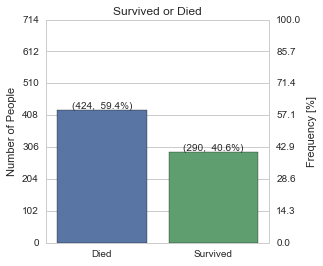

In [149]:
# Bar plot: survived and died people
import matplotlib.ticker as ticker

sns.set_style("whitegrid")
plt.figure(figsize=(4,4))
ax = sns.countplot(x="Survived", data=new_titanic)
ncount = len(new_titanic)
plt.title('Survived or Died')
plt.ylabel('Number of People')
plt.xlabel('')
ax.set_ylim(0,ncount)
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(8))
# Make twin axis
ax2=ax.twinx()
ax2.set_ylim(0,100)
ax2.set_ylabel('Frequency [%]')
# And use a MultipleLocator to ensure a tick spacing of 100/7
ax2.yaxis.set_major_locator(ticker.MultipleLocator(100./7))
ax2.grid(None) #turn the grid on ax2 off,
x_ticks =[]
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('({},  {:.1f}%)'.format(int(y),100.*y/ncount), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text
    x_ticks.append(x.mean())
plt.xticks(x_ticks,['Died','Survived']) # add x_ticks (location,ticks)


From the plot above, we can find that 424 people died, meanwhile, only 290 people survived, making up 59.4% and 40.6% respectively with the pupoluation of 714 people. So, without any other relative infomation, I would consider that one passenger would have a probability of 40.6% to survive.

In [87]:
#Fuction: get the absolute frequency of specify column, and survival rate 
# df['PassagerId',col,'Survived']:  col is the column we look into
# cat1, cat2, cat3 are the values of col

def get_fre_sur(df,cat1,cat2,cat3):
    col = list(df.columns)
    res_1 = grouping(df[col[0:2]],var_1=col[1])
    res_2 = grouping(df,var_1=col[1],var_2=col[2])
    for cat in [cat1,cat2,cat3]:
        cat_index = [cat1,cat2,cat3].index(cat)
        cat_rate = res_2.iloc[cat_index*2+1,2]*1.0/res_1.iloc[cat_index,1]
        print str(cat) + ' has a probability of {0:.2} to survive.'.format(cat_rate)
    return res_1,res_2

In [88]:
# get the number of children, men, women; absolute frequency and relative frequency of survior 
s1,s2 = get_fre_sur(new_titanic[['PassengerId','Who','Survived']],'Children','Men','Women')
print s1
print s2

Children has a probability of 0.54 to survive.
Men has a probability of 0.18 to survive.
Women has a probability of 0.77 to survive.
     Who  People_num
0  child         113
1    man         395
2  woman         206
     Who  Survived  People_num
0  child         0          52
1  child         1          61
2    man         0         325
3    man         1          70
4  woman         0          47
5  woman         1         159


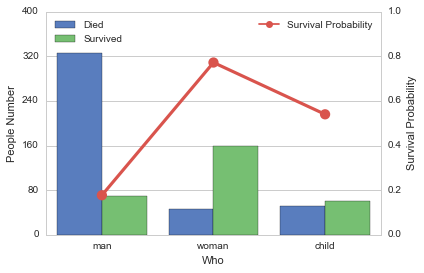

In [90]:
# bar chart: the survived and died people number of children, men, women
# line chart: survival rate of children, men, women
bx = sns.countplot(x="Who", hue="Survived",data=new_titanic,palette="muted")
bx.set(ylabel = 'People Number',ylim = (0,400))
plt.legend(('Died', 'Survived'),loc =2)
bx.yaxis.set_major_locator(ticker.LinearLocator(6))

bx2 = bx.twinx()
bx2 = sns.pointplot(x="Who", y="Survived",join=True, data=new_titanic,color = sns.xkcd_rgb["pale red"],ci = None)
bx2.set( ylabel="Survival Probability")
bx2.set_ylim(0,1)
bx2.yaxis.set_major_locator(ticker.LinearLocator(6))

fakeLine1 = plt.Line2D([0,0],[0,1], color=sns.xkcd_rgb["pale red"], marker='o', linestyle='-')
#Create legend from custom artist/label lists
bx2.legend([fakeLine1], ["Survival Probability"])
plt.legend()
bx2.grid(False)
plt.show()

#ref:
#https://stanford.edu/~mwaskom/software/seaborn/examples/index.html
#http://stackoverflow.com/questions/26868304/how-to-get-rid-of-grid-lines-when-plotting-with-seaborn-pandas-with-secondary
#http://matplotlib.org/api/lines_api.html
#http://stackoverflow.com/questions/26558816/matplotlib-scatter-plot-with-legend

From the plot above, we can find that men who accounts for most weight, has the lowerest survival rate below 0.2, meanwhile, women has the heightest survival rate about 0.8.

Ps: The line here that join each point allows interactions to be judged by differences in slope, which is easier for the eyes than comparing the heights of several groups of points. It's not an indication that the variables are continuous, or ordered. 

In [91]:
# get the number of different classes; absolute frequency and relative frequency of survior 
c1,c2 = get_fre_sur(new_titanic[['PassengerId','Pclass','Survived']],'First class','Second class','Third class')
print c1
print c2

First class has a probability of 0.66 to survive.
Second class has a probability of 0.48 to survive.
Third class has a probability of 0.24 to survive.
   Pclass  People_num
0       1         186
1       2         173
2       3         355
   Pclass  Survived  People_num
0       1         0          64
1       1         1         122
2       2         0          90
3       2         1          83
4       3         0         270
5       3         1          85


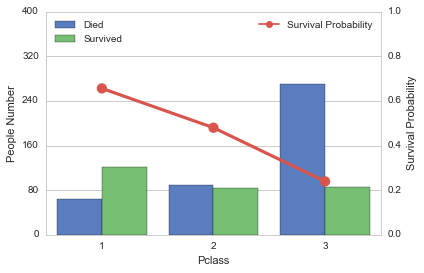

In [108]:
# bar chart: the survived and died people number of classes
# line chart: survival rate of classes
cx = sns.countplot(x="Pclass", hue="Survived",data=new_titanic,palette="muted")
cx.set(ylabel = 'People Number',ylim = (0,400))
plt.legend(('Died', 'Survived'),loc =2)
cx.yaxis.set_major_locator(ticker.LinearLocator(6))

cx2 = cx.twinx()
cx2 = sns.pointplot(x="Pclass", y="Survived",join=True, data=new_titanic,color = sns.xkcd_rgb["pale red"],ci = None)
cx2.set( ylabel="Survival Probability")
cx2.set_ylim(0,1)
cx2.yaxis.set_major_locator(ticker.LinearLocator(6))

fakeLine1 = plt.Line2D([0,0],[0,1], color=sns.xkcd_rgb["pale red"], marker='o', linestyle='-')
#Create legend from custom artist/label lists
cx2.legend([fakeLine1], ["Survival Probability"])
plt.legend()
cx2.grid(False)
plt.show()


From the plot above, it's obvious that the survival rate decreases with decreasing class. People of class three has the most population, but lowest survival rate about 0.2.

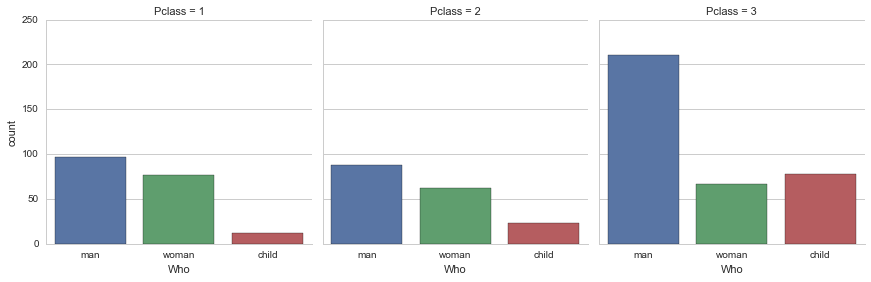

In [92]:
# bar chart: the people number of 3 classes,3 crowds 
sns.factorplot(x="Who", col="Pclass",data=new_titanic, kind="count")
plt.show()

From the plot above, we can find that in social class one and class two, the compositions of the crowd are almost the same, but very different from class three. Men accounts for most of the weight and child least in top two classes, while, women accounts the least percentage in class three. One possible reason for this phenomenon is that older children in class three have more family responsibilities than children in top two classes, therefore, they meight do some work for money in "Titanic".



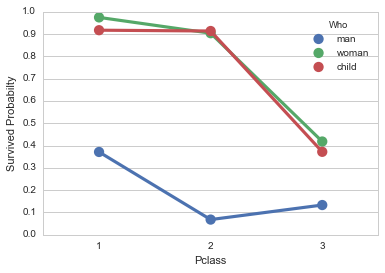

In [93]:
#pointplot: survival rate of three corwds of three classes.
cx = sns.pointplot(x="Pclass", y="Survived", join=True, hue='Who', data=new_titanic,ci=None)
cx.set(ylabel = 'Survived Probabilty',ylim = (0,1.0))
cx.yaxis.set_major_locator(ticker.LinearLocator(11))


It's obvious in the plot above that at the same social class, the survival rates of women and children is about the same, and always higher than men.   
Women of the class one has the highest survival rate near 100%, meanwhile, men of class two has the lowest survival rate lower than 10%.  
It's not hard to understand that women is given the priority of surviving while facing emergency, especially women of high social class.  
One possible reason for this phenomenon that men of class three is more likely to survive than class two, is that daily hard work bring those men stronger bodies.

<span id="jump2.4">
## 2.4 Draw conclusions:
</span>
1. Women and children were more likely to survive in this tragedy, especially women with a survival rate of 0.77, much higher than the generally survival rate 0.40. But, it didn't mean that a woman or child must survive.
2. The survival rate decreased with decreasing class.
3. Women and children of top two classes had a high survival rate about 0.9, especially women of class one had a nearly 100 percent chance to survive.

However, we need to be cautious about the above analysis. According to [kaggle](https://www.kaggle.com/c/titanic),  titanic carried 2224 passengers and deck crews. This data set concludes 890 passengers' information, which only accounts for 40% of the total population. With so little data, it's too difficult to completely show the fact, even impossible to calculate the survival rate precisely.  
  
Besides, this data set is filled with missing value, which I choose to omit. Though it's really convenient, it will possibly remove some useful infomation together and affect analysis results. For example, the survival rate of passengers who don't have age information is 0.29 given in the following table, which is much less than the generally survival rate calculated before. If we recalculate the survival rate using this whole data set, the survival rate will certainly be smaller.  
   
If this dataset add a new variable to distinguish passengers and staff, We can guess a one's survival probability more accurately. When facing emergency, staff are supposed to help passengers, leaving themselves little time and few ships to escape.


In [132]:
#titanic_null_age:a data set, include passengers without age information
#Calculate the number and survival rate of these passengers 
titanic_null_age = titanic[titanic['Age'].isnull()][['PassengerId','Survived']]
table_sur = grouping(titanic_null_age,'Survived')
table_sur['Rate'] = table_sur['People_num']/table_sur['People_num'].sum()
print "The survival rate of passengers(without age information) is {:.2}.".format(table_sur.iloc[1,2])
table_sur

The survival rate of passengers(without age information) is 0.29.


,Survived,People_num,Rate
0,0,125,0.706215
1,1,52,0.293785
